In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests
from selenium import webdriver

# 1. 시카고 샌드위치 맛집 분석

+  http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago

#### 1) 데이터 준비

In [17]:
url = "https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/"

# 로봇이 아님을 증명
headers={"User-Agent" : "Mozilla/5.0"} 
html = requests.get(url, headers=headers)

soup = BeautifulSoup(html.text, "html.parser")
soup

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<title>The 50 Best Sandwiches in Chicago – Chicago Magazine</title>
<style type="text/css">			.heateorSssInstagramBackground{background:radial-gradient(circle at 30% 107%,#fdf497 0,#fdf497 5%,#fd5949 45%,#d6249f 60%,#285aeb 90%)}
						div.heateor_sss_horizontal_sharing i.heateorSssInstagramBackground{background:#000!important;}div.heateor_sss_standard_follow_icons_container i.heateorSssInstagramBackground{background:#000;}
										.heateor_sss_horizontal_sharing .heateorSssSharing,.heateor_sss_standard_follow_icons_container .heateorSssSharing{
							background-color: #000;
							color: #fff;
						border-width: 0px;
			border-style: solid;
			border-color: transparent;
		}
				.heateor_sss_horizontal_sharing .heateorSssTCBackground{
			color:#666;
		}
				.heateor_sss_horizontal_sharing .heateorSssSharing:ho

In [18]:
print(soup.find_all("div", "sammy"))

[<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">2</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/"><b>Fried Bologna</b><br/>
Au Cheval<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">3</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/"><b>Woodland Mushroom</b><br/>
Xoco<br/>
<em>Read more</em> </a></div>
</div>, <div class="sammy" style="position: relative;">
<div class="sammyRank">4</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-R

In [19]:
len(soup.find_all("div", "sammy"))

50

In [20]:
print(soup.find_all("div", "sammy")[0])

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>


#### 2) parsing

In [22]:
##### 50개 데이터 중 첫번째 데이터 가져오기
one = soup.find_all("div", "sammy")[0]
print(type(one))
print(one)

<class 'bs4.element.Tag'>
<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br/>
Old Oak Tap<br/>
<em>Read more</em> </a></div>
</div>


In [24]:
##### 첫번째 데이터 중에서 랭킹 가져오기

one.find(class_ = "sammyRank").get_text()

'1'

In [32]:
##### 메뉴 이름과 가게 이름 가져오기

one_list = one.find(class_ = "sammyListing").get_text()

store = one.find(class_ = 'sammyListing').get_text().split(sep ='\n')[0]
menu = one.find(class_ = 'sammyListing').get_text().split(sep ='\n')[1]
print(store)
print(menu)

print("--------------------------------------------------------------------------")

one_s = one.find(class_ = 'sammyListing').get_text().split(sep ='\n')
print(one_s[0])
print(one_s[1])

print("--------------------------------------------------------------------------")

import re

print(re.split(("\n|\r\n"), one_list)[0])
print(re.split(("\n|\r\n"), one_list)[1])

BLT
Old Oak Tap
--------------------------------------------------------------------------
BLT
Old Oak Tap
--------------------------------------------------------------------------
BLT
Old Oak Tap


In [40]:
##### a 태그에서 href 값 가져오기

url = one.find("a")["href"]
print(url)

# 링크 경로의 형식이 동일하지 않기 때문에 똑같이 맞춰준다.

base = "https://www.chicagomag.com"

print(base + url)

print(urllib.parse.urljoin(base, url))

/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/
https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/
https://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/


#### 3) 각 데이터 수집

+ rank
+ main_menu
+ cafe_name
+ readmore

In [42]:
rank = []
main_menu = []
cafe_name = []
readmore = []
url_base = "https://www.chicagomag.com"

cafes = soup.find_all("div", "sammy")
for item in cafes:
    rank.append(item.find(class_ = "sammyRank").get_text())
    
    tmp = item.find(class_ = "sammyListing").get_text()
    main_menu.append(re.split(("\n|\r\n"), tmp)[0])
    cafe_name.append(re.split(("\n|\r\n"), tmp)[1])
    
    readmore.append(urllib.parse.urljoin(url_base, item.find("a")["href"]))

In [43]:
len(rank), len(main_menu), len(cafe_name), len(readmore)

(50, 50, 50, 50)

In [45]:
rank[:5]
main_menu[:5]

['BLT', 'Fried Bologna', 'Woodland Mushroom', 'Roast Beef', 'PB&L']

In [47]:
##### DataFrame에 저장

data = {"Rank":rank, "Cafe":cafe_name, "Menu":main_menu, "ReadMore":readmore}
df = pd.DataFrame(data)
df.head()

,Rank,Cafe,Menu,ReadMore
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...


#### 4) Checkpoint

In [48]:
df.to_csv("data/sandwiches.csv", sep=",", encoding="utf-8")

In [76]:
df = pd.read_csv("data/sandwiches.csv", index_col = 0)
df.head()

,Rank,Cafe,Menu,ReadMore
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...


#### 5) 상세 페이지 데이터 가져오기

In [64]:
url = df["ReadMore"][0]
html = requests.get(url, headers={"User-Agent" : "Mozilla/5.0"} )
soup = BeautifulSoup(html.text, "html.parser")
soup

detail = soup.find("p", "addy").get_text()
print(detail)

detail_split = detail.split()
print(detail_split)

# 가격 가져오기
print(detail_split[0])
print(detail_split[0][:-1])

# 주소 가져오기
' '.join(detail_split[1 : -2])


$10. 2109 W. Chicago Ave., 773-772-0406, theoldoaktap.com
['$10.', '2109', 'W.', 'Chicago', 'Ave.,', '773-772-0406,', 'theoldoaktap.com']
$10.
$10


'2109 W. Chicago Ave.,'

In [73]:
##### 각 데이터 수집 : 가격, 주소
##### jupyter notebook에서 상태 진행바를 보여주기
    # conda install -c conda-forge tqdm

from tqdm import tqdm_notebook

price = []
address = []


for n in tqdm_notebook(df.index):
    html = requests.get(df["ReadMore"][n], headers={"User-Agent" : "Mozilla/5.0"})
    soup = BeautifulSoup(html.text, "html.parser")
    
    detail = soup.find("p", "addy").get_text()
    
    price.append(detail.split()[0][ : -1])
    address.append(' '.join(detail.split()[1 : -2]))

In [70]:
print(len(price), len(address))
print(price[:5])
print(address[:5])

50 50
['$10', '$9', '$9.50', '$9.40', '$10']
['2109 W. Chicago Ave.,', '2109 W. Chicago Ave.,', '2109 W. Chicago Ave.,', '2109 W. Chicago Ave.,', '2109 W. Chicago Ave.,']


In [77]:
##### 두 개의 정보를 DataFrame에 추가

df["Price"] = price
df["Address"] = address
df.head()

,Rank,Cafe,Menu,ReadMore,Price,Address
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...,$10,"2109 W. Chicago Ave.,"
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...,$9,"800 W. Randolph St.,"
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...,$9.50,"445 N. Clark St.,"
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...,$9.40,"914 Noyes St., Evanston,"
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...,$10,"825 W. Fulton Mkt.,"


#### 6) Checkpoint

In [78]:
df.to_csv("data/sandwiches_final.csv", encoding="utf-8")

In [79]:
df = pd.read_csv("data/sandwiches_final.csv", index_col = 0)
df.head()

,Rank,Cafe,Menu,ReadMore,Price,Address
0,1,Old Oak Tap,BLT,https://www.chicagomag.com/Chicago-Magazine/No...,$10,"2109 W. Chicago Ave.,"
1,2,Au Cheval,Fried Bologna,https://www.chicagomag.com/Chicago-Magazine/No...,$9,"800 W. Randolph St.,"
2,3,Xoco,Woodland Mushroom,https://www.chicagomag.com/Chicago-Magazine/No...,$9.50,"445 N. Clark St.,"
3,4,Al’s Deli,Roast Beef,https://www.chicagomag.com/Chicago-Magazine/No...,$9.40,"914 Noyes St., Evanston,"
4,5,Publican Quality Meats,PB&L,https://www.chicagomag.com/Chicago-Magazine/No...,$10,"825 W. Fulton Mkt.,"


#### 7) 맛집의 위치를 지도에 표시

In [2]:
import folium

In [3]:
df = pd.read_csv('data/sandwiches_map.csv', index_col=0)
df.head(5)

,Menu,Cafe,ReadMore,Price,Address,Latitude,Longitude
Rank,,,,,,,
1,BLT,Old Oak Tap,https://www.chicagomag.com/Chicago-Magazine/No...,$10,2109 W. Chicago Ave.,41.895605,-87.679961
2,Fried Bologna,Au Cheval,https://www.chicagomag.com/Chicago-Magazine/No...,$9,800 W. Randolph St.,41.884658,-87.647667
3,Woodland Mushroom,Xoco,https://www.chicagomag.com/Chicago-Magazine/No...,$9.50,445 N. Clark St.,41.890523,-87.630783
4,Roast Beef,Al’s Deli,https://www.chicagomag.com/Chicago-Magazine/No...,$9.40,914 Noyes St.,42.058322,-87.683748
5,PB&L,Publican Quality Meats,https://www.chicagomag.com/Chicago-Magazine/No...,$10,825 W. Fulton Mkt.,41.886604,-87.648536


In [5]:
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=11)
folium.Marker([df['Latitude'].mean(), df['Longitude'].mean()], popup='center').add_to(map)
map

# 2. 네이버 영화 평점 기준으로 영화 평점 변화 분석

+ http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170806

#### 1) 데이터 준비

In [6]:
url = "http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170806"
page = urlopen(url)
soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20170806" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


#### 2) 샘플 코드 작성

In [12]:
##### 영화 제목 수집

print(soup.find_all("div", "tit5")[0])
print(len(soup.find_all("div", "tit5")))
print(soup.find_all("div", "tit5")[0].get_text())
print(soup.find_all("div", "tit5")[0].a.get_text())

<div class="tit5">
<a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
</div>
47

다크 나이트

다크 나이트


In [16]:
##### 평점 수집

print(len(soup.find_all("td", "point")))
print(soup.find_all("td", "point")[0].get_text())

47
9.32


In [21]:
##### 47개의 영화제목과 평점을 리스트 저장

movie_name = [soup.find_all("div", "tit5")[n].get_text() for n in range(47)]
movie_point = [soup.find_all("td", "point")[n].get_text() for n in range(47)]

In [22]:
print(movie_name)
print(movie_point)

['\n다크 나이트\n', '\n킹 오브 프리즘 프라이드 더 히어로\n', '\n킹 오브 프리즘\n', '\n내 사랑\n', '\n오즈의 마법사\n', '\n서서평, 천천히 평온하게\n', '\n로보캅\n', '\n플립\n', '\n헤드윅\n', '\n댄서\n', '\n이터널 선샤인\n', '\n명탐정 코난:진홍의 연가\n', '\n샤인\n', '\n택시운전사\n', '\n올드보이\n', '\n어네스트와 셀레스틴\n', '\n기쿠지로의 여름\n', '\n파도가 지나간 자리\n', '\n노무현입니다\n', '\n파이트 클럽\n', '\n스타쉽 트루퍼스\n', '\n청원\n', '\n토탈 리콜\n', '\n극장판 짱구는 못말려 : 습격!! 외계인 덩덩이\n', '\n너의 이름은.\n', '\n연애담\n', '\n슈퍼배드 3\n', '\n꿈의 제인\n', '\n심야식당2\n', '\n라라랜드\n', '\n카3: 새로운 도전\n', '\n오두막\n', '\n스파이더맨: 홈커밍\n', '\n옥자\n', '\n500일의 썸머\n', '\n복수는 나의 것\n', '\n덩케르크\n', '\n예수는 역사다\n', '\n매치 포인트\n', '\n7번째 내가 죽던 날\n', '\n47 미터\n', '\n친절한 금자씨\n', '\n송 투 송\n', '\n그 후\n', '\n박쥐\n', '\n싸이보그지만 괜찮아\n', '\n군함도\n']
['9.32', '9.27', '9.25', '9.24', '9.23', '9.23', '9.21', '9.20', '9.18', '9.14', '9.10', '9.10', '9.09', '9.08', '9.05', '9.05', '9.02', '9.00', '8.93', '8.91', '8.90', '8.87', '8.86', '8.83', '8.76', '8.75', '8.73', '8.70', '8.62', '8.59', '8.58', '8.48', '8.48', '8.47', '8.39', '8.34', '8.32', '8.12', '7.97

#### 3) 2017년 5월 1일부터 100일간의 데이터 수집

In [23]:
##### 날짜 인덱스를 생성

daterange = pd.date_range("2017-5-1", periods=100, freq="D")
daterange

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

In [24]:
from tqdm import tqdm_notebook

In [44]:
movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(daterange):
    url = "http://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date={}"
    page = urlopen(url.format(today.strftime("%Y%m%d")))
    soup = BeautifulSoup(page, "html.parser")
    
    cnt = len(soup.find_all("td", "point"))
    
    movie_date.extend([today for n in range(cnt)])
    movie_name.extend([soup.find_all("div", "tit5")[n].get_text().strip("\n") for n in range(cnt)])
    movie_point.extend(soup.find_all("td", "point")[n].get_text().strip("\n") for n in range(cnt))

In [45]:
len(movie_date), len(movie_name), len(movie_point)

(4723, 4723, 4723)

In [49]:
movie = pd.DataFrame({"date":movie_date, "name":movie_name, "point":movie_point})
movie.head()

,date,name,point
0,2017-05-01,히든 피겨스,9.38
1,2017-05-01,사운드 오브 뮤직,9.36
2,2017-05-01,시네마 천국,9.29
3,2017-05-01,미스 슬로운,9.26
4,2017-05-01,잉여들의 히치하이킹,9.25


In [33]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 110.8+ KB


In [50]:
movie["point"] = movie["point"].astype(float)
movie.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4723 entries, 0 to 4722
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4723 non-null   datetime64[ns]
 1   name    4723 non-null   object        
 2   point   4723 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 110.8+ KB


#### 4) EDA

In [57]:
##### 영화별로 점수의 합계를 보고 싶다.(평점의 합계가 높은 순 또는 낮은 순으로 10개씩)

m_point = pd.pivot_table(movie, index=["name"], aggfunc=np.sum)
m_point.head()

m_best = m_point.sort_values(by="point", ascending=False)
m_best.head(10)

,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42
노무현입니다,682.24
보스 베이비,644.21
겟 아웃,630.62
기쿠지로의 여름,613.43


In [58]:
##### 특정 영화만 추려서 보고 싶다.(예를 들어 겟아웃을 10개까지만 조회)

getout = movie.query("name == ['겟 아웃']")
getout.head(10)

,date,name,point
833,2017-05-17,겟 아웃,8.36
889,2017-05-18,겟 아웃,8.18
933,2017-05-19,겟 아웃,8.20
980,2017-05-20,겟 아웃,8.18
1022,2017-05-21,겟 아웃,8.18
1061,2017-05-22,겟 아웃,8.11
1102,2017-05-23,겟 아웃,8.15
1146,2017-05-24,겟 아웃,8.15
1192,2017-05-25,겟 아웃,8.15
1236,2017-05-26,겟 아웃,8.16


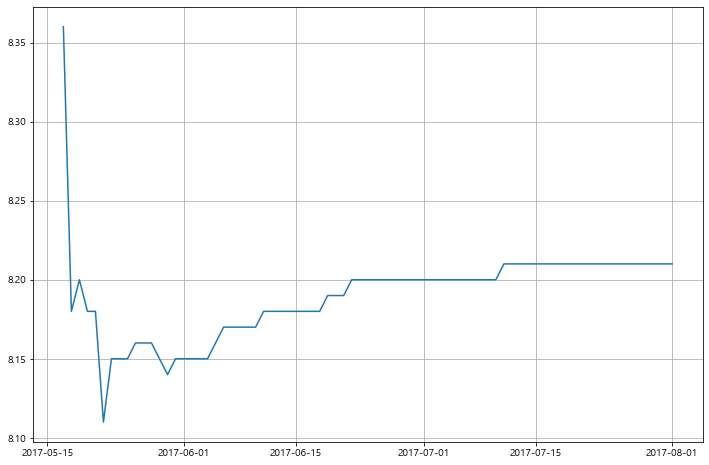

In [60]:
##### 위에 조회한 영화에 대해 날짜별 평점으로 시각화

plt.figure(figsize = (12, 8))
plt.plot(getout["date"], getout["point"])
plt.grid()

In [64]:
##### 영화별 날짜 변화에 따른 평점 변화를 확인(데이터 프레임으로 구성)

movie2 = movie.pivot_table(index=["date"], columns=["name"], values=["point"])
movie2.head()

movie2.columns = movie2.columns.droplevel()
movie2.head()

name,10분,47 미터,500일의 썸머,7년-그들이 없는 언론,7번째 내가 죽던 날,7인의 사무라이,8 마일,가디언즈 오브 갤럭시,가디언즈 오브 갤럭시 VOL. 2,겟 아웃,...,하울의 움직이는 성,하이큐!! 끝과 시작,한공주,해리가 샐리를 만났을 때,핵소 고지,행복 목욕탕,헤드윅,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히든 피겨스
date,,,,,,,,,,,,,,,,,,,,,
2017-05-01,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.20,9.38
2017-05-02,8.89,NaN,NaN,NaN,NaN,NaN,NaN,8.56,NaN,NaN,...,NaN,NaN,8.78,8.89,NaN,8.68,NaN,NaN,9.21,9.37
2017-05-03,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.22,NaN,...,NaN,NaN,8.78,8.89,NaN,8.70,NaN,NaN,9.22,9.38
2017-05-04,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.15,NaN,...,NaN,NaN,8.78,NaN,NaN,8.67,NaN,NaN,9.23,9.38
2017-05-05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.08,NaN,...,NaN,NaN,8.78,NaN,NaN,8.69,NaN,NaN,9.24,9.37


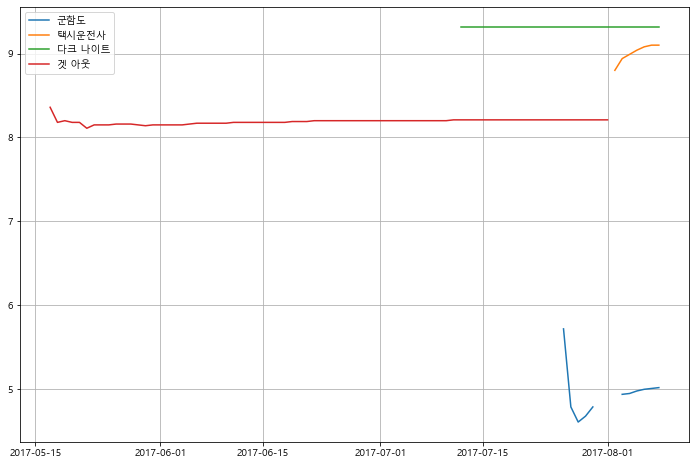

In [65]:
##### 몇 개의 영화를 뽑아 평점 변화에 대한 시각화 구현

target = ["군함도", "택시운전사", "다크 나이트", "겟 아웃"]
plt.figure(figsize = (12, 8))
plt.plot(movie2[target])
plt.legend(target, loc="best")
plt.grid()

                               point
name                                
애나벨                             6.92
비포 선셋                           8.74
본 투 비 블루                        8.77
짱구는 못말려 극장판: 폭풍수면! 꿈꾸는 세계 대돌격   8.85
비포 선라이즈                         8.90
로건                              9.06
더 록                             9.30
사랑은 비를 타고                       9.31
인생은 아름다워                        9.38
콜로설                            10.97
-------------------------------------------------
                point
name                 
댄서             914.60
서서평, 천천히 평온하게  889.64
오두막            861.65
라라랜드           858.89
너의 이름은.        738.42
노무현입니다         682.24
보스 베이비         644.21
겟 아웃           630.62
기쿠지로의 여름       613.43
에이리언: 커버넌트     599.67
           date   name  point
3788 2017-07-20  47 미터   7.48
3834 2017-07-21  47 미터   7.34
3882 2017-07-22  47 미터   7.79
3930 2017-07-23  47 미터   7.58
3979 2017-07-24  47 미터   7.55
4031 2017-07-25  47 미터   7.53
4079 2017-07-26  47 미터   7.48
41

<AxesSubplot:xlabel='date'>

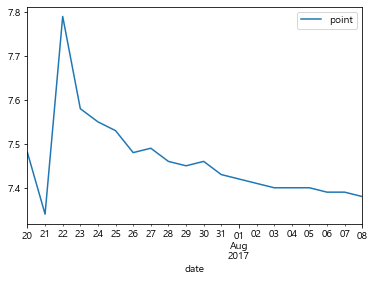

In [52]:
movie_group = movie.groupby('name').sum()
print(movie_group.sort_values(by='point').head(10))
print("-------------------------------------------------")
print(movie_group.sort_values(by='point', ascending  = False).head(10))

# 특정 영화만 추려서 보고 싶다.(예를 들어 겟아웃을 10 까지만 조회)
# movie.groupby('name').count()
meter_47 = movie[movie['name'] == '47 미터']
print(meter_47.head(10))

# 위에 조회한 영화에 대한 날짜별 평점으로 시각화
meter_47_date = meter_47.groupby('date').sum()
meter_47_date.plot(kind = 'line')


,point
name,
댄서,914.60
"서서평, 천천히 평온하게",889.64
오두막,861.65
라라랜드,858.89
너의 이름은.,738.42
노무현입니다,682.24
보스 베이비,644.21
겟 아웃,630.62
기쿠지로의 여름,613.43


,point
name,
애나벨,6.92
비포 선셋,8.74
본 투 비 블루,8.77
짱구는 못말려 극장판: 폭풍수면! 꿈꾸는 세계 대돌격,8.85
비포 선라이즈,8.90
로건,9.06
더 록,9.30
사랑은 비를 타고,9.31
인생은 아름다워,9.38


,date,name,point
833,2017-05-17,겟 아웃,8.36
889,2017-05-18,겟 아웃,8.18
933,2017-05-19,겟 아웃,8.20
980,2017-05-20,겟 아웃,8.18
1022,2017-05-21,겟 아웃,8.18
...,...,...,...
4169,2017-07-28,겟 아웃,8.21
4218,2017-07-29,겟 아웃,8.21
4267,2017-07-30,겟 아웃,8.21
4319,2017-07-31,겟 아웃,8.21


point                                                        \
name         10분 47 미터 500일의 썸머 7년-그들이 없는 언론 7번째 내가 죽던 날 7인의 사무라이 8 마일   
date                                                                     
2017-05-01  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-02  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-03  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-04  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
2017-05-05  8.89   NaN      NaN          NaN         NaN      NaN  NaN   
...          ...   ...      ...          ...         ...      ...  ...   
2017-08-04   NaN  7.40     8.39          NaN        7.84      NaN  NaN   
2017-08-05   NaN  7.40     8.39          NaN        7.84      NaN  NaN   
2017-08-06   NaN  7.39     8.39          NaN        7.84      NaN  NaN   
2017-08-07   NaN  7.39     8.39          NaN        7.84      NaN  NaN   
2017-08-08   NaN  7.38     8.39          NaN        7.85      NaN  NaN   

                                                ...                         \
name       가디언즈 오브 갤럭시 가디언즈 오브 갤럭시 VOL. 2 겟 아웃  ... 하울의 움직이는 성 하이큐!! 끝과 시작   
date                                            ...                          
2017-05-01        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-02        8.56                NaN  NaN  ...        NaN         NaN   
2017-05-03         NaN               9.22  NaN  ...        NaN         NaN   
2017-05-04         NaN               9.15  NaN  ...        NaN         NaN   
2017-05-05         NaN               9.08  NaN  ...        NaN         NaN   
...                ...                ...  ...  ...        ...         ...   
2017-08-04         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-05         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-06         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-07         NaN                NaN  NaN  ...        NaN         NaN   
2017-08-08         NaN                NaN  NaN  ...        NaN         NaN   

                                                                           \
name         한공주 해리가 샐리를 만났을 때 핵소 고지 행복 목욕탕   헤드윅 환상의 빛 흑집사 : 북 오브 더 아틀란틱   
date                                                                        
2017-05-01  8.78          8.89   NaN   8.70   NaN   NaN              9.20   
2017-05-02  8.78          8.89   NaN   8.68   NaN   NaN              9.21   
2017-05-03  8.78          8.89   NaN   8.70   NaN   NaN              9.22   
2017-05-04  8.78           NaN   NaN   8.67   NaN   NaN              9.23   
2017-05-05  8.78           NaN   NaN   8.69   NaN   NaN              9.24   
...          ...           ...   ...    ...   ...   ...               ...   
2017-08-04   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-05   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-06   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-07   NaN           NaN   NaN    NaN  9.18   NaN               NaN   
2017-08-08   NaN           NaN   NaN    NaN  9.18   NaN               NaN   

                   
name       히든 피겨스  
date               
2017-05-01   9.38  
2017-05-02   9.37  
2017-05-03   9.38  
2017-05-04   9.38  
2017-05-05   9.37  
...           ...  
2017-08-04    NaN  
2017-08-05    NaN  
2017-08-06    NaN  
2017-08-07    NaN  
2017-08-08    NaN  

[100 rows x 204 columns]

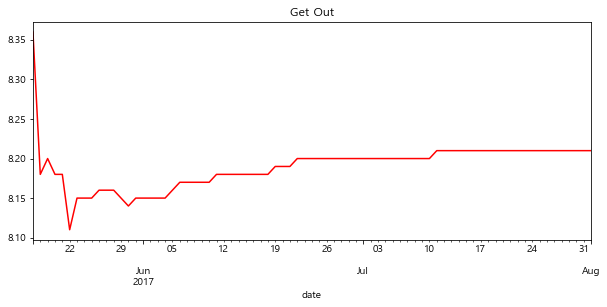

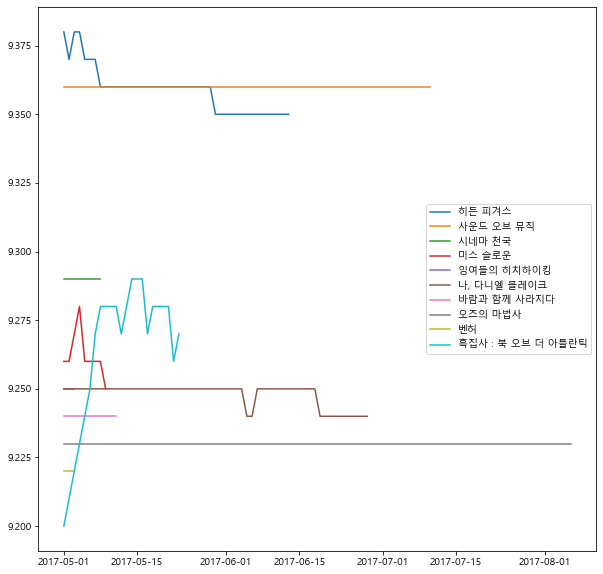

In [53]:
### 영화별로 점수의 합계를 보고 싶다.(평점의 합계가 높은 순 또는 낮은 순으로 10개씩)
display(movie.groupby(by='name').sum()[['point']].sort_values(by='point', ascending=False).head(10))
display(movie.groupby(by='name').sum()[['point']].sort_values(by='point').head(10))

### 특정 영화면 추려서 보고 싶다.(겟아웃)
get_out = movie[movie['name']=='겟 아웃'].copy()
display(get_out)

#### 위에 조회한 영화에 대해 날짜별 평점으로 시각화
get_out.set_index('date')['point'].plot(figsize =(10, 4), color='red', title='Get Out')


## 영화별 날짜 변화에 따른 평점 변화를 확인 (시각화)
plt.figure(figsize =(10, 10))

for name in movie['name'].unique()[0:10] :  # 전체는 너무 많아서 10개만 출력했습니다.
    data = movie[movie['name']== name]
    data = data.set_index('date')['point']
    plt.plot(data, label=name)

plt.legend()

display(movie.groupby(by=['date', 'name']).mean().unstack('name')) ## (데이터 프레임)